### Gerekli Kütüphaneler

In [1]:
# Veri hazırlama kütüphaneleri ve fonksiyonları
import pandas as pd # DataFrame işlemleri için gerekli kütüphane
import numpy as np # Veri dönüşüm işlemleri için gerekli kütüphane
from sklearn.datasets import make_classification # Örnek veri oluşturmamızı sağlayan fonksiyon
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# Deneylerde kullanılacak model sınıfları
from lightgbm import LGBMClassifier # Testler için kullanacağımız modellerden biri
# PSI fonksiyonu
from psi import PSIAnalyzer

### Örnek Verilerin Oluşturulması

In [2]:
# Oluşturulan verinin tekrar oluşturulabilmesi için seed belirlenmesi
seed=42
np.random.seed(seed)

In [3]:
# `make_classification` ile sınıflandırmada kullanılabilecek dengesiz hedef değişkenli 100000 satırlı verinin oluşturulması
X_aug, y_aug = make_classification(n_samples=100000, n_features=10, n_informative=7, weights=(0.9,0.1), random_state=seed)

# Dataframe olarak incelemek için dönüşüm ve kolon isimlendirmesi
X_aug = pd.DataFrame(X_aug, columns=[f"col_{i}" for i in range(X_aug.shape[1])])

# Oluşturduğumuz verinin detaylarının basılması
print("="*25, "   X DataFrame  ", "="*25)
display(X_aug.head())
print("="*25, "Target Imbalance", "="*25)
print(f"0 count: {(y_aug==0).sum()}")
print(f"1 count: {(y_aug==1).sum()}")

=========================    X DataFrame   =========================


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,3.197676,-2.800413,-1.527916,-0.491880,1.730903,0.521123,0.250006,1.469551,-1.714025,-0.186888
1,1.186403,0.448904,3.026690,-0.860983,-0.234724,-2.325762,-1.168963,0.588183,1.428323,0.768333
2,2.863709,-2.530777,-1.309516,-1.063332,1.226491,-0.870329,-0.283520,0.708026,-0.280935,0.356122
3,3.219682,-1.691040,0.859993,0.616355,1.012476,2.041413,0.146607,3.184386,-0.194316,0.953300
4,5.040023,-3.212000,-1.577097,-2.244883,1.327070,0.391909,1.558274,2.089386,-1.304580,0.085353


========================= Target Imbalance =========================
0 count: 89591
1 count: 10409


In [4]:
# `make_classification` ile sınıflandırmada kullanılabilecek dengesiz hedef değişkenli 100000 satırlı verinin oluşturulması
X_sep, y_sep = make_classification(n_samples=100000, n_features=10, n_informative=7, weights=(0.87,0.13), random_state=seed)
#_, X_sep, _, y_sep = train_test_split(X_sep, y_sep, test_size=0.2, random_state=seed, stratify=y_sep)

# Dataframe olarak incelemek için dönüşüm ve kolon isimlendirmesi
X_sep = pd.DataFrame(X_sep, columns=[f"col_{i}" for i in range(X_sep.shape[1])])

# Oluşturduğumuz verinin detaylarının basılması
print("="*25, "   X DataFrame  ", "="*25)
display(X_sep.head())
print("="*25, "Target Imbalance", "="*25)
print(f"0 count: {(y_sep==0).sum()}")
print(f"1 count: {(y_sep==1).sum()}")

=========================    X DataFrame   =========================


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,3.197676,-2.800413,-1.527916,-0.491880,1.730903,0.521123,0.250006,1.469551,-1.714025,-0.186888
1,1.186403,0.448904,3.026690,-0.860983,-0.234724,-2.325762,-1.168963,0.588183,1.428323,0.768333
2,2.863709,-2.530777,-1.309516,-1.063332,1.226491,-0.870329,-0.283520,0.708026,-0.280935,0.356122
3,3.219682,-1.691040,0.859993,0.616355,1.012476,2.041413,0.146607,3.184386,-0.194316,0.953300
4,5.040023,-3.212000,-1.577097,-2.244883,1.327070,0.391909,1.558274,2.089386,-1.304580,0.085353


========================= Target Imbalance =========================
0 count: 86623
1 count: 13377


In [5]:
# `make_classification` ile sınıflandırmada kullanılabilecek dengesiz hedef değişkenli 100000 satırlı verinin oluşturulması
X_oct, y_oct = make_classification(n_samples=100000, n_features=10, n_informative=7, weights=(0.7,0.3), random_state=seed)
#_, X_oct, _, y_oct = train_test_split(X_oct, y_oct, test_size=0.2, random_state=seed, stratify=y_oct)
# Dataframe olarak incelemek için dönüşüm ve kolon isimlendirmesi
X_oct = pd.DataFrame(X_oct, columns=[f"col_{i}" for i in range(X_oct.shape[1])])

# Oluşturduğumuz verinin detaylarının basılması
print("="*25, "   X DataFrame  ", "="*25)
display(X_oct.head())
print("="*25, "Target Imbalance", "="*25)
print(f"0 count: {(y_oct==0).sum()}")
print(f"1 count: {(y_oct==1).sum()}")

=========================    X DataFrame   =========================


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,3.197676,-2.800413,-1.527916,-0.491880,1.730903,0.521123,0.250006,1.469551,-1.714025,-0.186888
1,1.186403,0.448904,3.026690,-0.860983,-0.234724,-2.325762,-1.168963,0.588183,1.428323,0.768333
2,2.863709,-2.530777,-1.309516,-1.063332,1.226491,-0.870329,-0.283520,0.708026,-0.280935,0.356122
3,3.219682,-1.691040,0.859993,0.616355,1.012476,2.041413,0.146607,3.184386,-0.194316,0.953300
4,5.040023,-3.212000,-1.577097,-2.244883,1.327070,0.391909,1.558274,2.089386,-1.304580,0.085353


========================= Target Imbalance =========================
0 count: 69788
1 count: 30212


In [6]:
# `make_classification` ile sınıflandırmada kullanılabilecek dengesiz hedef değişkenli 100000 satırlı verinin oluşturulması
X_nov, y_nov = make_classification(n_samples=100000, n_features=10, n_informative=7, weights=(0.9,0.1), 
                                   shift=[np.random.lognormal(mean=0) if _ < 3 else 0 for _ in range(10)], random_state=seed)
#_, X_nov, _, y_nov = train_test_split(X_nov, y_nov, test_size=0.2, random_state=seed, stratify=y_nov)
# Dataframe olarak incelemek için dönüşüm ve kolon isimlendirmesi
X_nov = pd.DataFrame(X_nov, columns=[f"col_{i}" for i in range(X_nov.shape[1])])

# Oluşturduğumuz verinin detaylarının basılması
print("="*25, "   X DataFrame  ", "="*25)
display(X_nov.head())
print("="*25, "Target Imbalance", "="*25)
print(f"0 count: {(y_nov==0).sum()}")
print(f"1 count: {(y_nov==1).sum()}")

=========================    X DataFrame   =========================


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,3.197676,-2.800413,-0.657048,1.151433,1.730903,0.521123,0.250006,3.380670,-1.714025,-0.186888
1,1.186403,0.448904,3.897559,0.782330,-0.234724,-2.325762,-1.168963,2.499301,1.428323,0.768333
2,2.863709,-2.530777,-0.438648,0.579981,1.226491,-0.870329,-0.283520,2.619145,-0.280935,0.356122
3,3.219682,-1.691040,1.730862,2.259668,1.012476,2.041413,0.146607,5.095504,-0.194316,0.953300
4,5.040023,-3.212000,-0.706228,-0.601571,1.327070,0.391909,1.558274,4.000504,-1.304580,0.085353


========================= Target Imbalance =========================
0 count: 89591
1 count: 10409


### Model Eğitimi ve Farklı Aylar için Tahminler

In [7]:
# Eğitim ve test setlerinin ayrıştırılması
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, test_size=0.2, random_state=seed, stratify=y_aug)

In [8]:
model = LGBMClassifier(random_state=seed)
model.fit(X_train_aug, y_train_aug)

[LightGBM] [Info] Number of positive: 8327, number of negative: 71673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.104087 -> initscore=-2.152611
[LightGBM] [Info] Start training from score -2.152611


LGBMClassifier(random_state=42)

In [9]:
aug_probas = model.predict_proba(X_test_aug)[:,1]
sep_probas = model.predict_proba(X_sep)[:,1]
oct_probas = model.predict_proba(X_oct)[:,1]
nov_probas = model.predict_proba(X_nov)[:,1]

### Modele Girdi Olan Verinin Farklı Zamanlar Arasındaki Sapma Miktarı ve PSI Metriği

#### Ağustos ve Eylül Kolon 2 için Karşılaştırma

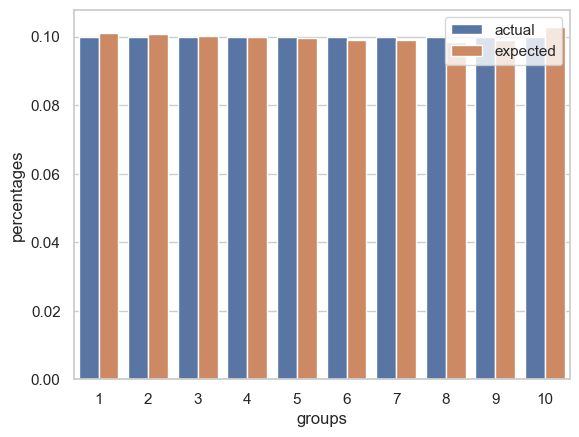

0.0001383851259787947


In [10]:
psi_analyzer = PSIAnalyzer(X_aug["col_2"], X_sep["col_2"], group=10)
psi, _ = psi_analyzer._psi_calculator()
psi_analyzer._visualize()
print(psi)

#### Ağustos ve Ekim Kolon 2 için Karşılaştırma

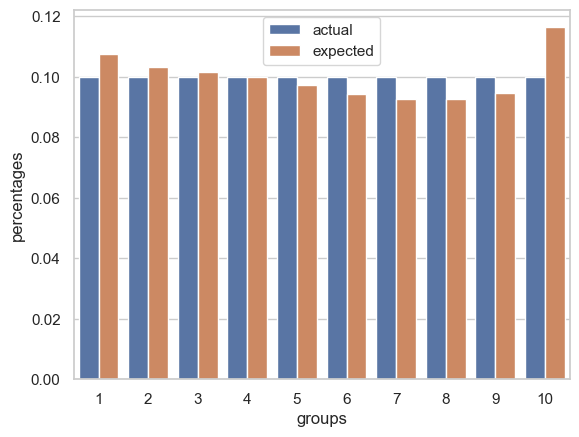

0.005015935340493527


In [11]:
psi_analyzer = PSIAnalyzer(X_aug["col_2"], X_oct["col_2"], group=10)
psi, _ = psi_analyzer._psi_calculator()
psi_analyzer._visualize()
print(psi)

#### Ağustos ve Kasım Kolon 2 için Karşılaştırma

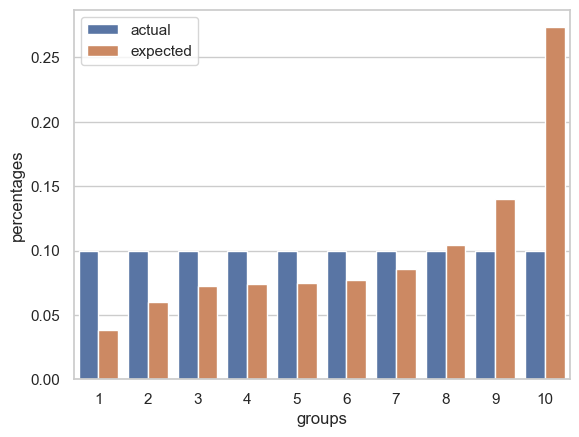

0.3008312056154566


In [12]:
psi_analyzer = PSIAnalyzer(X_aug["col_2"], X_nov["col_2"], group=10)
psi, _ = psi_analyzer._psi_calculator()
psi_analyzer._visualize()
print(psi)

### Modele Çıktılarının Farklı Zamanlar Arasındaki Sapma Miktarı ve PSI Metriği

#### Ağustos ve Eylül Karşılaştırması

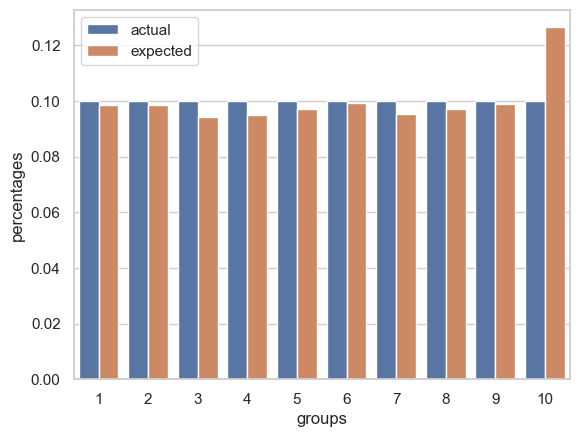

0.007324119946571525


In [13]:
psi_analyzer = PSIAnalyzer(aug_probas, sep_probas, group=10)
psi, _ = psi_analyzer._psi_calculator()
psi_analyzer._visualize()
print(psi)

#### Ağustos ve Ekim Karşılaştırması

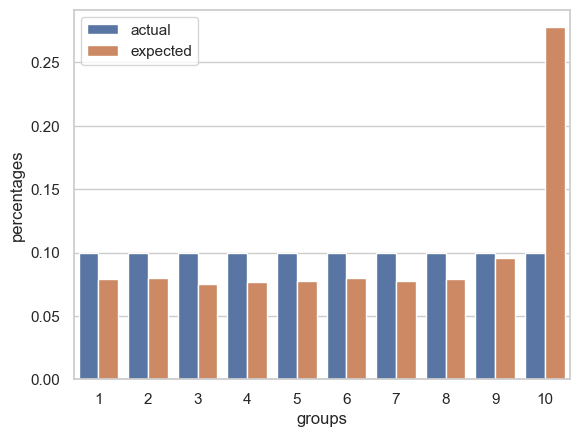

0.22466516424763822


In [14]:
psi_analyzer = PSIAnalyzer(aug_probas, oct_probas, group=10)
psi, _ = psi_analyzer._psi_calculator()
psi_analyzer._visualize()
print(psi)

#### Ağustos ve Kasım Karşılaştırması

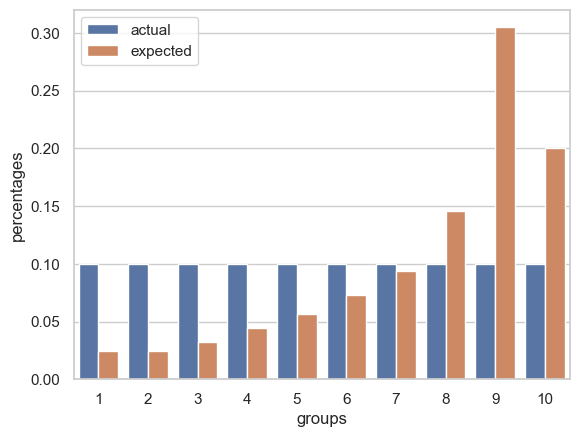

0.6824143400845694


In [15]:
psi_analyzer = PSIAnalyzer(aug_probas, nov_probas, group=10)
psi, _ = psi_analyzer._psi_calculator()
psi_analyzer._visualize()
print(psi)